##**SDAIA Bootcamp Project  ( سالك )**



This code performs classification of road conditions into three classes: normal, traffic, and anomaly (specifically for fire and accidents).

# Import Data

In [ ]:
#connect to googel drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#connect to dataset
p= '/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1'

# Packages


In [ ]:
#import all packeges
import tensorflow as tf  # Import the TensorFlow library for deep learning
import pandas as pd  # Import the pandas library for data manipulation and analysis
import numpy as np  # Import the NumPy library for numerical operations
import matplotlib.pyplot as plt  # Import the matplotlib library for data visualization
from matplotlib.pyplot import *
import cv2  # Import the OpenCV library for image processing
import glob  # Import the glob module for file system operations
import seaborn as sns  # Import the seaborn library for statistical data visualization
import os  # Import the os module for operating system-related functionalities
from sklearn.model_selection import train_test_split  # Import train_test_split function from scikit-learn for splitting data
from tensorflow.keras import datasets, layers, models  # Import specific moduls
from sklearn.metrics import confusion_matrix, classification_report  # Import confusion_matrix and classification_report functions for model evaluation
from tensorflow import keras  # Import the keras module from TensorFlow for building deep learning models
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import ImageDataGenerator class for data augmentation
from tensorflow.keras.models import Sequential  # Import the Sequential class from keras for creating sequential models
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D  # Import specific layers from keras for building convolutional neural networks
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy  # Import specific loss functions from keras for model training
from tensorflow.keras.optimizers import Adam  # Import the Adam optimizer for model training

# Preprocessing

In [ ]:
#our classes
classes=["anomaly","normal","traffic"]


In [ ]:
#create labels for train dataset
#get the image file path
path = "/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1/train"
path_imgs = list(glob.glob(path+'/**/*.jpg'))
# Create labels
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], path_imgs))
# Create a Pandas Series for file paths and labels
file_path = pd.Series(path_imgs, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
# Concatenate file_path and labels into a DataFrame
datatrain = pd.concat([file_path, labels], axis=1)
# Shuffle the DataFrame
datatrain = datatrain.sample(frac=1).reset_index(drop=True)
# Display the first 5 rowes for data
datatrain.head()


File_Path   Labels
0  /content/drive/MyDrive/trafficnet_dataset_v1/t...  traffic
1  /content/drive/MyDrive/trafficnet_dataset_v1/t...  traffic
2  /content/drive/MyDrive/trafficnet_dataset_v1/t...  anomaly
3  /content/drive/MyDrive/trafficnet_dataset_v1/t...   normal
4  /content/drive/MyDrive/trafficnet_dataset_v1/t...   normal

In [ ]:
# same process for craeting labels for test data
path = "/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1/test"
path_imgs = list(glob.glob(path+'/**/*.jpg'))
labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1], path_imgs))
file_path = pd.Series(path_imgs, name='File_Path').astype(str)
labels = pd.Series(labels, name='Labels')
datatest = pd.concat([file_path, labels], axis=1)
datatest = datatest.sample(frac=1).reset_index(drop=True)
datatest.head()

File_Path   Labels
0  /content/drive/MyDrive/trafficnet_dataset_v1/t...   normal
1  /content/drive/MyDrive/trafficnet_dataset_v1/t...  traffic
2  /content/drive/MyDrive/trafficnet_dataset_v1/t...  anomaly
3  /content/drive/MyDrive/trafficnet_dataset_v1/t...   normal
4  /content/drive/MyDrive/trafficnet_dataset_v1/t...  traffic

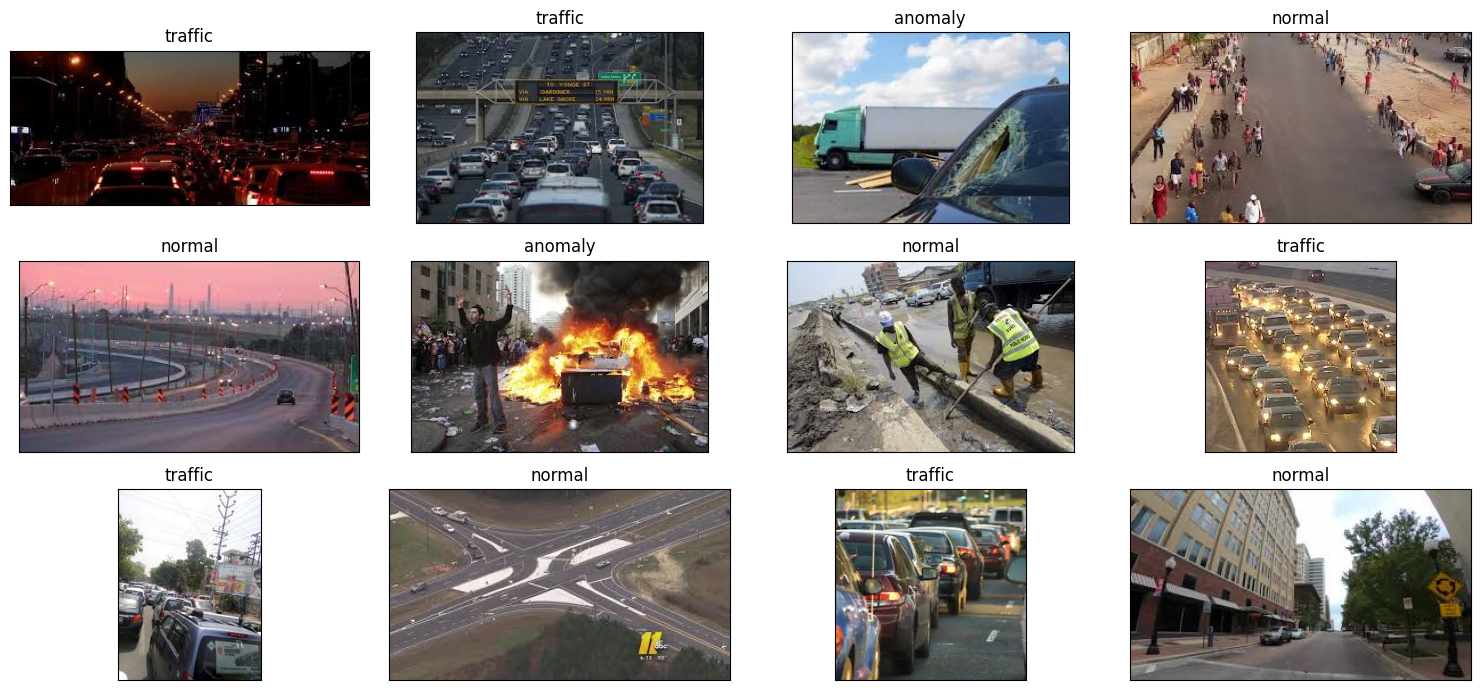

In [ ]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})
# Iterate over the flattened array of axes
for i, ax in enumerate(axes.flat):
    # Display the image
    ax.imshow(plt.imread(datatrain.File_Path[i]))
    # set the titel
    ax.set_title(datatrain.Labels[i])
plt.tight_layout()
plt.show()

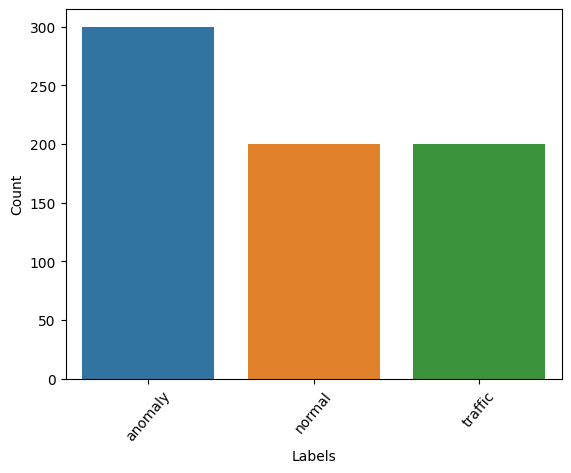

In [ ]:
# create bar chart for our classes with counts
counts = datatest.Labels.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=50)
plt.show()

In [ ]:
data=[] # Initialize an empty list to store image data and labels
# Iterate over the classes
for c in classes:
    i=classes.index(c)
    path = os.path.join('/content/drive/MyDrive/trafficnet_dataset_v1/trafficnet_dataset_v1/train/', c)
    # Iterate over the files in the class directory
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            # Process  and resize the images
            im=cv2.imread(os.path.join(path,img))
            im=cv2.resize(im,(224,224))
            # Append the image and its corresponding label to the data lis
            data.append([im,i])
        else:
            # Skip other files (DB files in this case)
            continue

In [ ]:
#converting the data into a NumPy array allows for efficient operations on the data.
data=np.array(data)
import random
random.shuffle(data)

<ipython-input-42-60b4dfe7bb24>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array(data)


In [ ]:
X=[]
Y=[]
for x,y in data:
    X.append(x)  # Append the image data to the X list
    Y.append(y)  # Append the label to the Y list

In [ ]:
# Convert the list of image data and labels to a NumPy array then print the shape
x = np.array(X)
y = np.array(Y)
print(x.shape,y.shape)

(2780, 224, 224, 3) (2780,)


In [ ]:
# Split the data into training and testing sets with a 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4, stratify=y)

In [ ]:
# Normalize the pixel values of x_train and x_test between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0


(1946, 224, 224, 3) (1946,)
(834, 224, 224, 3) (834,)


In [ ]:
print("Train set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Train set shape: (1946, 224, 224, 3)
Test set shape: (834, 224, 224, 3)


In [ ]:

# Split the data into training and validation sets
x_train, data_x_val, y_train, data_y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=4)

In [ ]:
num_images_val = len(x_train)
print("Number of images in train set:", num_images_val)

Number of images in train set: 1459


In [ ]:
num_images_val = len(x_test)
print("Number of images in test set:", num_images_val)

Number of images in test set: 834


In [ ]:

num_images_val = len(data_x_val)
print("Number of images in validation set:", num_images_val)

Number of images in validation set: 487


In [ ]:
x_train.shape

(1459, 224, 224, 3)

# Build MobileNetV2 Model

In [ ]:
# Create a MobileNetV2 model with specified configuration and load pre-trained weights
model_mobileNet = tf.keras.applications.mobilenet_v2.MobileNetV2(
    input_shape=None,
    alpha=1.0,
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax')

# freeze layers in base model
for layer in model_mobileNet.layers:
    layer.trainable = False


In [ ]:
# Get the input tensor of the base model
# Get the output tensor of the second-to-last layer in the base model
base_input1 = model_mobileNet.layers[0].input
base_output1 = model_mobileNet.layers[-2].output

final_output1 = layers.Dense(128)(base_output1)  # Add a Dense layer with 128 units on top of the base model's output
final_output1 = layers.Activation('relu')(final_output1) # Apply a ReLU activation to the previous layer's output
final_output1 = layers.Dense(64)(final_output1) # Add another Dense layer with 64 units
final_output1 = layers.Activation('relu')(final_output1)  # Apply a ReLU activation to the previous layer's output
final_output1 = layers.Dense(6, activation='softmax')(final_output1) # Add a final Dense layer with 6 units and a softmax activation

new_model_mobileNet = tf.keras.Model(inputs = base_input1, outputs = final_output1)
new_model_mobileNet.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"]) # Compile the new model with the specified loss, optimizer, and metrics


In [ ]:
#use callback stop the training process early if the monitored metric stops improving
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [ ]:
#fit the model
history_new_model_mobileNet = new_model_mobileNet.fit(x_train, y_train, epochs=25,callbacks=[callback], validation_data=(data_x_val, data_y_val))

Epoch 1/25
46/46 [==============================] - 7s 92ms/step - loss: 0.6102 - accuracy: 0.7848 - val_loss: 0.4147 - val_accuracy: 0.8604
Epoch 2/25
46/46 [==============================] - 3s 57ms/step - loss: 0.3191 - accuracy: 0.8903 - val_loss: 0.3270 - val_accuracy: 0.8973
Epoch 3/25
46/46 [==============================] - 3s 57ms/step - loss: 0.2419 - accuracy: 0.9130 - val_loss: 0.2443 - val_accuracy: 0.9035
Epoch 4/25
46/46 [==============================] - 3s 57ms/step - loss: 0.2035 - accuracy: 0.9301 - val_loss: 0.2179 - val_accuracy: 0.9179
Epoch 5/25
46/46 [==============================] - 3s 57ms/step - loss: 0.1744 - accuracy: 0.9404 - val_loss: 0.1985 - val_accuracy: 0.9117
Epoch 6/25
46/46 [==============================] - 3s 72ms/step - loss: 0.1528 - accuracy: 0.9554 - val_loss: 0.1847 - val_accuracy: 0.9199
Epoch 7/25
46/46 [==============================] - 3s 57ms/step - loss: 0.1370 - accuracy: 0.9554 - val_loss: 0.1620 - val_accuracy: 0.9302
Epoch 8/25
46

In [ ]:
# Predict the classes on the test set.
y_predict = new_model_mobileNet.predict(x_test)

27/27 [==============================] - 2s 40ms/step


In [ ]:
# Evaluate the model
result_MobileNetV2_val = new_model_mobileNet.evaluate(x_train, y_train)
print("\nTraining Accuracy: %.2f%%" % (result_MobileNetV2_val[1]*100))
result_MobileNetV2 = new_model_mobileNet.evaluate(x_test, y_test)
print("\nTesting Accuracy: %.2f%%" % (result_MobileNetV2[1]*100))

46/46 [==============================] - 2s 42ms/step - loss: 0.0210 - accuracy: 1.0000

Training Accuracy: 100.00%
27/27 [==============================] - 1s 41ms/step - loss: 0.1476 - accuracy: 0.9556

Testing Accuracy: 95.56%


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       598
           1       0.91      0.92      0.91       186
           2       0.91      0.82      0.86        50

    accuracy                           0.96       834
   macro avg       0.93      0.91      0.92       834
weighted avg       0.96      0.96      0.96       834



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


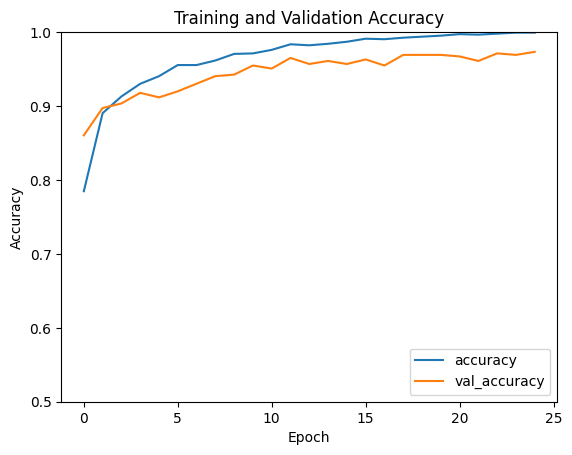

In [ ]:
# Plot validation accuracy
# Plot training accuracy
plt.plot(history_new_model_mobileNet.history['accuracy'], label='accuracy')
plt.plot(history_new_model_mobileNet.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
#classification_report
print(classification_report(y_test, np.argmax(y_predict, axis=1)))
# Save the new model to a file
new_model_mobileNet.save("new_model_mobileNet.h5")

# Build ResNet50V2 Model

In [ ]:
# Create a ResNet50V2 model with specified configuration and load pre-trained weights
model_resNet50V2 = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax')

# freeze layers in base model
for layer in model_resNet50V2.layers:
    layer.trainable = False

#model_resNet50V2.summary()

102869336/102869336 [==============================] - 3s 0us/step


In [ ]:
base_input2 = model_resNet50V2.layers[0].input
base_output2 = model_resNet50V2.layers[-2].output

final_output2 = layers.Dense(240)(base_output2) # Add a Dense layer
final_output2 = layers.Activation('relu')(final_output2) # Apply a ReLU activation
final_output2 = layers.Dense(128)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)

final_output2 = layers.Dropout(0.5)(final_output2)

final_output2 = layers.Dense(64)(final_output2)
final_output2 = layers.Activation('relu')(final_output2)
final_output2 = layers.Dense(6, activation='softmax')(final_output2)

new_model_resNet50V2 = tf.keras.Model(inputs = base_input2, outputs = final_output2)
new_model_resNet50V2.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

# Train RseNet50V2 Model



In [ ]:
#fit the model
history_new_model_resNet50V2 = new_model_resNet50V2.fit(x_train, y_train, epochs=25,callbacks=[callback], validation_data=(data_x_val, data_y_val))

Epoch 1/25
46/46 [==============================] - 14s 193ms/step - loss: 0.7382 - accuracy: 0.7258 - val_loss: 0.4204 - val_accuracy: 0.8255
Epoch 2/25
46/46 [==============================] - 6s 122ms/step - loss: 0.3710 - accuracy: 0.8739 - val_loss: 0.3136 - val_accuracy: 0.8665
Epoch 3/25
46/46 [==============================] - 6s 123ms/step - loss: 0.3079 - accuracy: 0.8869 - val_loss: 0.2417 - val_accuracy: 0.8891
Epoch 4/25
46/46 [==============================] - 6s 124ms/step - loss: 0.2467 - accuracy: 0.9198 - val_loss: 0.2177 - val_accuracy: 0.9138
Epoch 5/25
46/46 [==============================] - 6s 125ms/step - loss: 0.2180 - accuracy: 0.9219 - val_loss: 0.1770 - val_accuracy: 0.9302
Epoch 6/25
46/46 [==============================] - 6s 124ms/step - loss: 0.1866 - accuracy: 0.9315 - val_loss: 0.1613 - val_accuracy: 0.9363
Epoch 7/25
46/46 [==============================] - 6s 124ms/step - loss: 0.1729 - accuracy: 0.9411 - val_loss: 0.1522 - val_accuracy: 0.9363
Epoch

In [ ]:
# Perform prediction on the test data using the new_model_resNet50V2
y_predict = new_model_resNet50V2.predict(x_test)


27/27 [==============================] - 4s 113ms/step


In [ ]:
result_ResNet50V2_val = new_model_resNet50V2.evaluate(x_train, y_train)

46/46 [==============================] - 4s 90ms/step - loss: 0.0123 - accuracy: 0.9973


In [ ]:
#print the accuracy for training and testing
print("\nTraining Accuracy: %.2f%%" % (result_ResNet50V2_val[1]*100))
result_ResNet50V2 = new_model_resNet50V2.evaluate(x_test, y_test)
print("\nTesting Accuracy: %.2f%%" % (result_ResNet50V2[1]*100))



Training Accuracy: 99.73%
27/27 [==============================] - 2s 88ms/step - loss: 0.1303 - accuracy: 0.9616

Testing Accuracy: 96.16%


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       598
           1       0.94      0.90      0.92       186
           2       0.93      0.78      0.85        50

    accuracy                           0.96       834
   macro avg       0.95      0.89      0.92       834
weighted avg       0.96      0.96      0.96       834



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


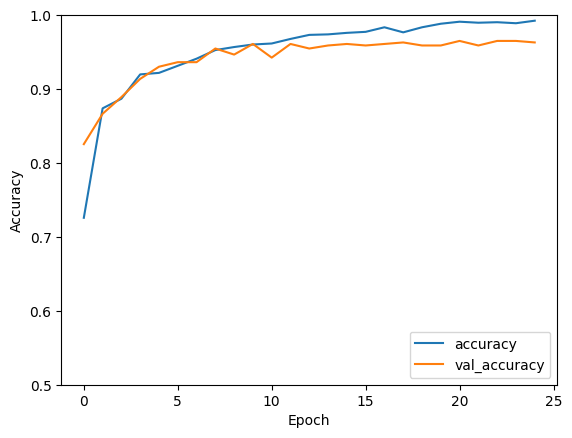

In [ ]:
# Plot training accuracy
# Plot validation accuracy
plt.plot(history_new_model_resNet50V2.history['accuracy'], label='accuracy')
plt.plot(history_new_model_resNet50V2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#classification_report
print(classification_report(y_test, np.argmax(y_predict, axis=1)))
# Save the new model to a file
new_model_resNet50V2.save("new_model_resNet50V2.h5")

# Build DenseNet169 Model

In [ ]:
# Create a DenseNet169 model with pre-trained weights from ImageNet
model_denseNet169 = tf.keras.applications.densenet.DenseNet169(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    # classifier_activation='softmax'
    classifier_activation='softmax')

# freeze layers in base model
for layer in model_denseNet169.layers:
    layer.trainable = False

# model_denseNet169.summary()

58541896/58541896 [==============================] - 3s 0us/step


In [ ]:
base_input3 = model_denseNet169.layers[0].input
base_output3 = model_denseNet169.layers[-2].output

final_output3 = layers.Dense(240)(base_output3) # add a dense layer with 240 units
final_output3 = layers.Activation('relu')(final_output3) # apply the ReLU activation function
final_output3 = layers.Dense(128)(final_output3)
final_output3 = layers.Activation('relu')(final_output3)

final_output3 = layers.Dropout(0.2)(final_output3) # apply a dropout layer with a rate of 0.2 to prevent overfitting

final_output3 = layers.Dense(64)(final_output3)
final_output3 = layers.Activation('relu')(final_output3)
final_output3 = layers.Dense(6, activation='softmax')(final_output3)

new_model_denseNet169 = tf.keras.Model(inputs = base_input3, outputs = final_output3) # create a new model
new_model_denseNet169.compile(loss="sparse_categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"]) # compile the model with the specified loss function, optimizer, and metric


In [ ]:
# fit the model
history_new_model_denseNet169 = new_model_denseNet169.fit(x_train, y_train, epochs=25,callbacks=[callback], validation_data=(data_x_val, data_y_val))

Epoch 1/25
46/46 [==============================] - 26s 321ms/step - loss: 0.6986 - accuracy: 0.7704 - val_loss: 0.3958 - val_accuracy: 0.8583
Epoch 2/25
46/46 [==============================] - 7s 157ms/step - loss: 0.3397 - accuracy: 0.8787 - val_loss: 0.2925 - val_accuracy: 0.8973
Epoch 3/25
46/46 [==============================] - 7s 158ms/step - loss: 0.2614 - accuracy: 0.9157 - val_loss: 0.2578 - val_accuracy: 0.8871
Epoch 4/25
46/46 [==============================] - 7s 158ms/step - loss: 0.2248 - accuracy: 0.9219 - val_loss: 0.2124 - val_accuracy: 0.9117
Epoch 5/25
46/46 [==============================] - 7s 157ms/step - loss: 0.1886 - accuracy: 0.9273 - val_loss: 0.1930 - val_accuracy: 0.9220
Epoch 6/25
46/46 [==============================] - 7s 156ms/step - loss: 0.1630 - accuracy: 0.9417 - val_loss: 0.1586 - val_accuracy: 0.9405
Epoch 7/25
46/46 [==============================] - 7s 155ms/step - loss: 0.1414 - accuracy: 0.9541 - val_loss: 0.1462 - val_accuracy: 0.9446
Epoch

In [ ]:
y_predict = new_model_denseNet169.predict(x_test)


27/27 [==============================] - 7s 165ms/step


In [ ]:
result_DenseNet169_val = new_model_denseNet169.evaluate(x_train, y_train)


46/46 [==============================] - 5s 115ms/step - loss: 0.0107 - accuracy: 0.9993


In [ ]:
# print the accuracy for training and testing
print("\nTraining Accuracy: %.2f%%" % (result_DenseNet169_val[1]*100))
result_DenseNet169 = new_model_denseNet169.evaluate(x_test, y_test)
print("\nTesting Accuracy: %.2f%%" % (result_DenseNet169[1]*100))



Training Accuracy: 99.93%
27/27 [==============================] - 3s 112ms/step - loss: 0.0958 - accuracy: 0.9676

Testing Accuracy: 96.76%


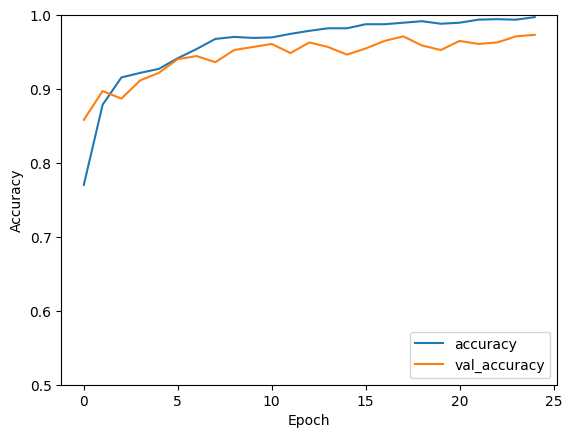

In [ ]:
# Plot the training and validation accuracy
plt.plot(history_new_model_denseNet169.history['accuracy'], label='accuracy')
plt.plot(history_new_model_denseNet169.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
# Save the new model
new_model_mobileNet.save("new_model_denseNet169.h5")

# Build CNN Model

In [ ]:
CNN = Sequential()

CNN.add(Conv2D(32, kernel_size = (
# Convolution blocks
CNN.add(Conv2D(32, kernel_size = (3,3), padding='same',input_shape=(224,224,3),activation='relu'))
CNN.add(MaxPooling2D(pool_size=2))

CNN.add(Conv2D(64, kernel_size = (3,3), padding='same',activation='relu'))
CNN.add(MaxPooling2D(pool_size=2))3,3), padding='same',activation='relu'))
CNN.add(MaxPooling2D(pool_size=2))

# Classification layers
CNN.add(Flatten())

CNN.add(Dense(64,activation='relu'))
CNN.add(Dropout(0.2))
CNN.add(Dense(32,activation='relu'))

CNN.add(Dropout(0.2))
CNN.add(Dense(6,activation='softmax'))


In [ ]:
# compile the CNN model
CNN.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#fit CNN model
history_model = CNN.fit(x_train, y_train, epochs=20, validation_data=(data_x_val, data_y_val))

Epoch 1/20
46/46 [==============================] - 7s 79ms/step - loss: 0.9586 - accuracy: 0.6895 - val_loss: 0.8392 - val_accuracy: 0.6838
Epoch 2/20
46/46 [==============================] - 2s 45ms/step - loss: 0.8140 - accuracy: 0.7135 - val_loss: 0.8088 - val_accuracy: 0.6838
Epoch 3/20
46/46 [==============================] - 2s 44ms/step - loss: 0.8277 - accuracy: 0.7005 - val_loss: 0.8039 - val_accuracy: 0.6838
Epoch 4/20
46/46 [==============================] - 2s 44ms/step - loss: 0.7988 - accuracy: 0.7114 - val_loss: 0.7816 - val_accuracy: 0.6838
Epoch 5/20
46/46 [==============================] - 2s 45ms/step - loss: 0.7748 - accuracy: 0.7183 - val_loss: 0.7785 - val_accuracy: 0.6838
Epoch 6/20
46/46 [==============================] - 2s 44ms/step - loss: 0.7536 - accuracy: 0.7210 - val_loss: 0.7466 - val_accuracy: 0.6838
Epoch 7/20
46/46 [==============================] - 2s 45ms/step - loss: 0.7233 - accuracy: 0.7361 - val_loss: 0.6980 - val_accuracy: 0.6858
Epoch 8/20
46

In [ ]:
y_predict = CNN.predict(x_test)


27/27 [==============================] - 1s 17ms/step


In [ ]:
result_CNN_val = CNN.evaluate(x_train, y_train)


46/46 [==============================] - 1s 16ms/step - loss: 0.3555 - accuracy: 0.8684


In [ ]:
# print the accuracy for training and testing
print("\nTraining Accuracy: %.2f%%" % (result_CNN_val[1]*100))
result_CNN = CNN.evaluate(x_test, y_test)
print("\nTesting Accuracy: %.2f%%" % (result_CNN[1]*100))



Training Accuracy: 86.84%
27/27 [==============================] - 0s 15ms/step - loss: 0.4736 - accuracy: 0.8153

Testing Accuracy: 81.53%


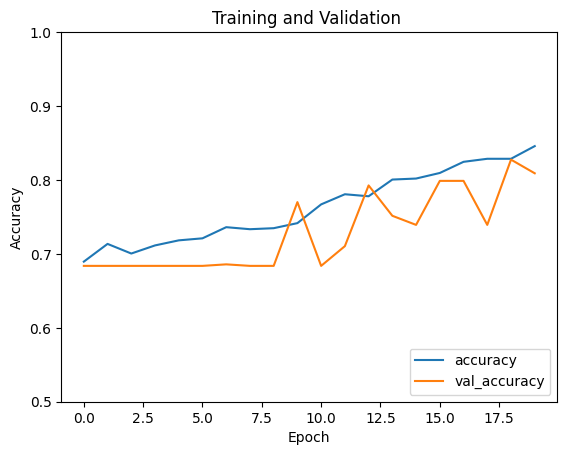

In [ ]:
plt.plot(history_model.history['accuracy'], label='accuracy')
plt.plot(history_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('Training and Validation ')
plt.legend(loc='lower right')

CNN.save("new_model_CNN.h5")

#Final Report

In [ ]:
#create new dataframe named output with 2 coulmns and list the models
output = pd.DataFrame({'Model':['MobileNetV2','ResNet50V2','DenseNet169','CNN'],
                      'Accuracy':[ result_MobileNetV2[1]*100, result_ResNet50V2[1]*100 , result_DenseNet169[1]*100 ,result_CNN[1]*100 ]})

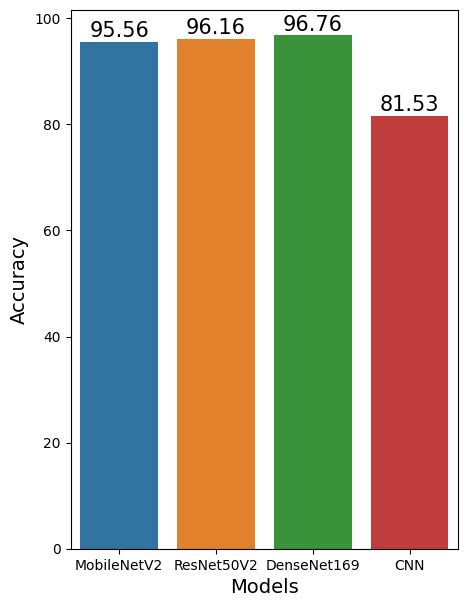

In [ ]:
# Create a new figure to compare all four models accuracy
plt.figure(figsize=(5, 7))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.show()

27/27 [==============================] - 2s 41ms/step


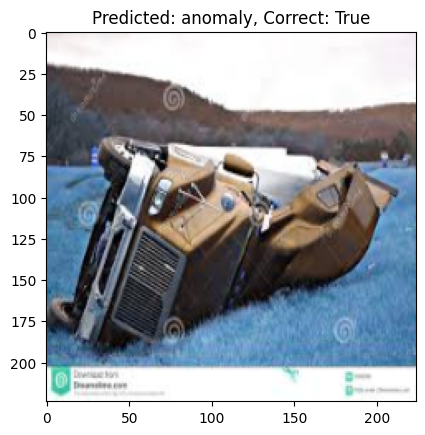

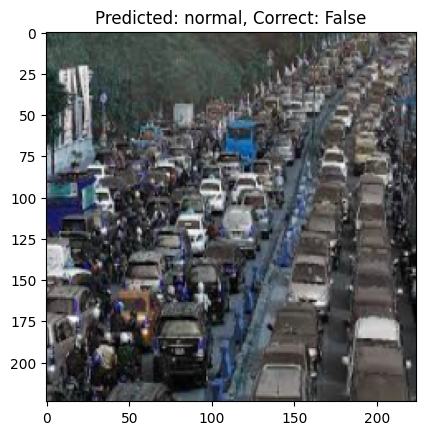

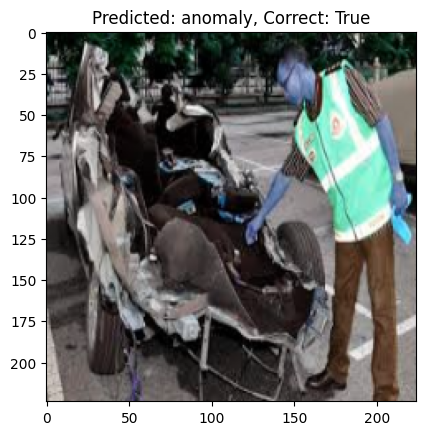

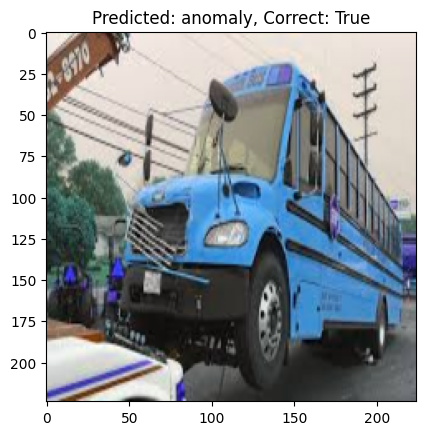

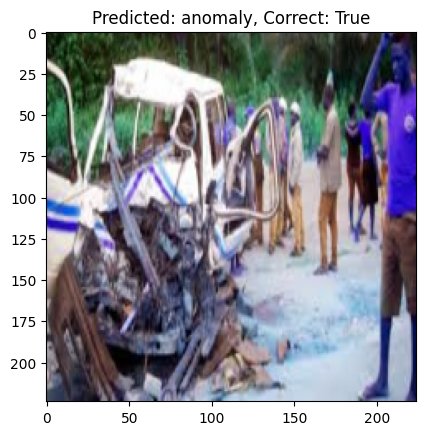

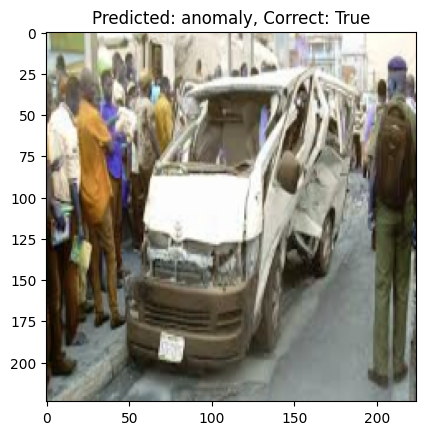

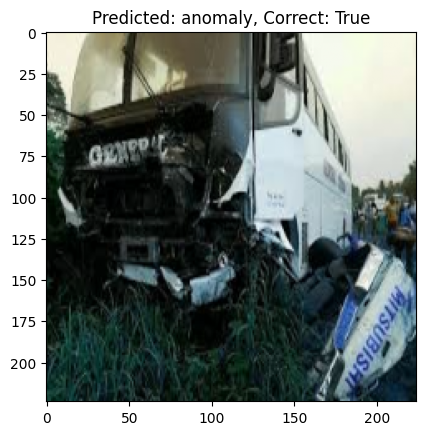

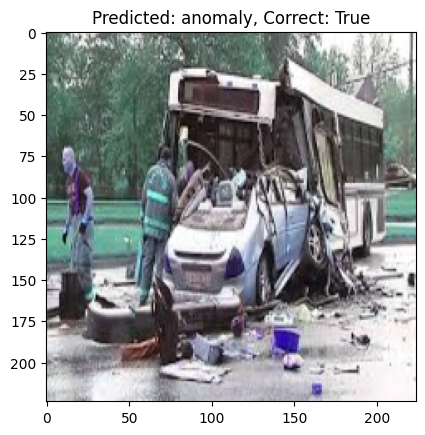

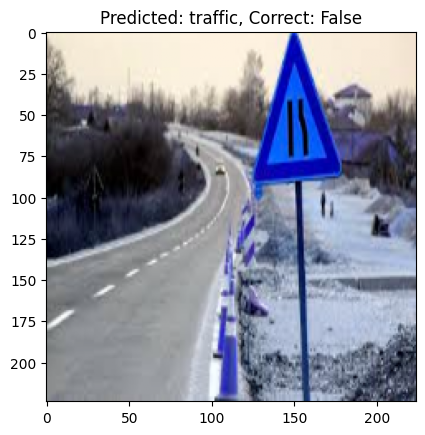

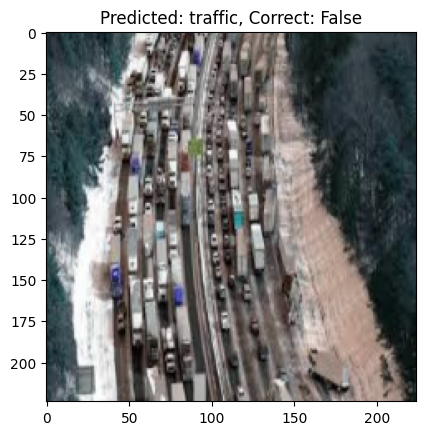

In [ ]:
#Load the saved model and use the model to make predictions on the test data
model = tf.keras.models.load_model('/content/new_model_denseNet169.h5')
predictions = model.predict(x_test)
class_labels = ['anomaly', 'traffic', 'normal']
# Display the predicted images with true or false label
for i in range(10):
    predicted_index = np.argmax(predictions[i])
    true_index = np.argmax(y_test[i]) # get index of the true label
    image = x_test[i] # get image from the test data

# Get the predicted label using the predicted index
# Get the true label using the true index
    predicted_label = class_labels[predicted_index]
    true_label = class_labels[true_index]

    is_true = predicted_label == true_label  # Check if the predicted label is the same as the true label
    label_text = "True" if is_true else "False"

    plt.imshow(image)
    plt.title(f'Predicted: {predicted_label}, Correct: {label_text}')
    plt.show()